In [144]:
import pandas as pd
import numpy as np
import string
import re
import nltk
# nltk.download()

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import matplotlib.pyplot as plt

In [163]:
df = pd.read_csv("../data/svm_tweets/twitter_training.csv", header = None)
df = df[df[1] == "Amazon"]
df.columns = ["c0","c1","class","text"] 
# df = df.drop_duplicates(inplace = True)
df = df[(df["class"] == "Positive") | (df["class"] == "Negative")]
size = 100        # sample size
replace = True  # with replacement
fn = lambda obj: obj.loc[np.random.choice(obj.index, size, replace),:]
df = df.groupby('class', as_index=False).apply(fn).reset_index()
df = df[["text","class"]]
df["text"] = df["text"].astype("str")
df

,text,class
0,"@ amazon Your turkey organization is a mess, B...",Negative
1,Is Amazon getting dumber? I've bought four of ...,Negative
2,"If you like it, you'll regret it",Negative
3,if you try this you’ll regret it,Negative
4,<unk> wtf.,Negative
...,...,...
195,New season of'The Boys'is back on the Amazon w...,Positive
196,Couldn't agree more. It's excellent.,Positive
197,Today they ’ as s seven best deals : Rare Sky ...,Positive
198,Thank my God they are willing to work,Positive


In [76]:
remove_rt = lambda x: re.sub('RT @\w+: '," ",str(x))
rt = lambda x: re.sub("(@[A-Za-z0–9]+)|([0-9A-Za-z \t])|(\w+:\/\/\S+)",
                      " ",
                      str(x))
df["text2"] = df.text.map(remove_rt).map(rt)
df["text2"] = df.text.str.lower()
df

,text,class,text2
0,Greedy fucks,Negative,greedy fucks
1,LET IT,Negative,let it
2,@amazon have scheduled reverse pick up since 2...,Negative,@amazon have scheduled reverse pick up since 2...
3,I swear to God I will burn something if the en...,Negative,i swear to god i will burn something if the en...
4,........ Please don't piss it off.,Negative,........ please don't piss it off.
...,...,...,...
95,we literally have people all over the games ma...,Positive,we literally have people all over the games ma...
96,we literally have people all over the games ma...,Positive,we literally have people all over the games ma...
97,Highly recommended! This will be perfect memor...,Positive,highly recommended! this will be perfect memor...
98,"5 best products: Rare Book Pro deal, free Amaz...",Positive,"5 best products: rare book pro deal, free amaz..."


In [65]:
# def create_wordcloud(text):
#     mask = np.array(Image.open(“cloud.png”))
#     stopwords = set(STOPWORDS)
#     wc = WordCloud(background_color=”white”,
#     mask = mask,
#     max_words=3000,
#     stopwords=stopwords,
#     repeat=True)
#     wc.generate(str(text))
#     wc.to_file(“wc.png”)
#     print(“Word Cloud Saved Successfully”)
#     path=”wc.png”
#     display(Image.open(path))

In [77]:
def remove_punct(text):
    text = "".join([char for char in text if char not in string.punctuation])
    text = re.sub("[0–9]+", "", text)
    return text

In [78]:
df["text_punct"] = df["text2"].apply(lambda x: remove_punct(x))
df

,text,class,text2,text_punct
0,Greedy fucks,Negative,greedy fucks,greedy fucks
1,LET IT,Negative,let it,let it
2,@amazon have scheduled reverse pick up since 2...,Negative,@amazon have scheduled reverse pick up since 2...,amazon have scheduled reverse pick up since 28...
3,I swear to God I will burn something if the en...,Negative,i swear to god i will burn something if the en...,i swear to god i will burn something if the en...
4,........ Please don't piss it off.,Negative,........ please don't piss it off.,please dont piss it off
...,...,...,...,...
95,we literally have people all over the games ma...,Positive,we literally have people all over the games ma...,we literally have people all over the games ma...
96,we literally have people all over the games ma...,Positive,we literally have people all over the games ma...,we literally have people all over the games ma...
97,Highly recommended! This will be perfect memor...,Positive,highly recommended! this will be perfect memor...,highly recommended this will be perfect memora...
98,"5 best products: Rare Book Pro deal, free Amaz...",Positive,"5 best products: rare book pro deal, free amaz...",5 best products rare book pro deal free amazon...


In [79]:
def tokenization(text):
    text = re.split('\W+', text)
    return text

df['tokenized'] = df['text_punct'].apply(lambda x: tokenization(x.lower()))
df

,text,class,text2,text_punct,tokenized
0,Greedy fucks,Negative,greedy fucks,greedy fucks,"[greedy, fucks]"
1,LET IT,Negative,let it,let it,"[let, it]"
2,@amazon have scheduled reverse pick up since 2...,Negative,@amazon have scheduled reverse pick up since 2...,amazon have scheduled reverse pick up since 28...,"[amazon, have, scheduled, reverse, pick, up, s..."
3,I swear to God I will burn something if the en...,Negative,i swear to god i will burn something if the en...,i swear to god i will burn something if the en...,"[i, swear, to, god, i, will, burn, something, ..."
4,........ Please don't piss it off.,Negative,........ please don't piss it off.,please dont piss it off,"[, please, dont, piss, it, off]"
...,...,...,...,...,...
95,we literally have people all over the games ma...,Positive,we literally have people all over the games ma...,we literally have people all over the games ma...,"[we, literally, have, people, all, over, the, ..."
96,we literally have people all over the games ma...,Positive,we literally have people all over the games ma...,we literally have people all over the games ma...,"[we, literally, have, people, all, over, the, ..."
97,Highly recommended! This will be perfect memor...,Positive,highly recommended! this will be perfect memor...,highly recommended this will be perfect memora...,"[highly, recommended, this, will, be, perfect,..."
98,"5 best products: Rare Book Pro deal, free Amaz...",Positive,"5 best products: rare book pro deal, free amaz...",5 best products rare book pro deal free amazon...,"[5, best, products, rare, book, pro, deal, fre..."


In [80]:
stopword = nltk.corpus.stopwords.words('english')
def remove_stopwords(text):
    text = [word for word in text if word not in stopword]
    return text
    
df['nonstop'] = df['tokenized'].apply(lambda x: remove_stopwords(x))
df

,text,class,text2,text_punct,tokenized,nonstop
0,Greedy fucks,Negative,greedy fucks,greedy fucks,"[greedy, fucks]","[greedy, fucks]"
1,LET IT,Negative,let it,let it,"[let, it]",[let]
2,@amazon have scheduled reverse pick up since 2...,Negative,@amazon have scheduled reverse pick up since 2...,amazon have scheduled reverse pick up since 28...,"[amazon, have, scheduled, reverse, pick, up, s...","[amazon, scheduled, reverse, pick, since, 28, ..."
3,I swear to God I will burn something if the en...,Negative,i swear to god i will burn something if the en...,i swear to god i will burn something if the en...,"[i, swear, to, god, i, will, burn, something, ...","[swear, god, burn, something, entirety, lord, ..."
4,........ Please don't piss it off.,Negative,........ please don't piss it off.,please dont piss it off,"[, please, dont, piss, it, off]","[, please, dont, piss]"
...,...,...,...,...,...,...
95,we literally have people all over the games ma...,Positive,we literally have people all over the games ma...,we literally have people all over the games ma...,"[we, literally, have, people, all, over, the, ...","[literally, people, games, market, havent, bri..."
96,we literally have people all over the games ma...,Positive,we literally have people all over the games ma...,we literally have people all over the games ma...,"[we, literally, have, people, all, over, the, ...","[literally, people, games, market, havent, bri..."
97,Highly recommended! This will be perfect memor...,Positive,highly recommended! this will be perfect memor...,highly recommended this will be perfect memora...,"[highly, recommended, this, will, be, perfect,...","[highly, recommended, perfect, memorabilia, gi..."
98,"5 best products: Rare Book Pro deal, free Amaz...",Positive,"5 best products: rare book pro deal, free amaz...",5 best products rare book pro deal free amazon...,"[5, best, products, rare, book, pro, deal, fre...","[5, best, products, rare, book, pro, deal, fre..."


In [81]:
#Appliyng Stemmer
ps = nltk.PorterStemmer()
def stemming(text):
    text = [ps.stem(word) for word in text]
    return text

df['stemmed'] = df['nonstop'].apply(lambda x: stemming(x))
df

,text,class,text2,text_punct,tokenized,nonstop,stemmed
0,Greedy fucks,Negative,greedy fucks,greedy fucks,"[greedy, fucks]","[greedy, fucks]","[greedi, fuck]"
1,LET IT,Negative,let it,let it,"[let, it]",[let],[let]
2,@amazon have scheduled reverse pick up since 2...,Negative,@amazon have scheduled reverse pick up since 2...,amazon have scheduled reverse pick up since 28...,"[amazon, have, scheduled, reverse, pick, up, s...","[amazon, scheduled, reverse, pick, since, 28, ...","[amazon, schedul, revers, pick, sinc, 28, feb,..."
3,I swear to God I will burn something if the en...,Negative,i swear to god i will burn something if the en...,i swear to god i will burn something if the en...,"[i, swear, to, god, i, will, burn, something, ...","[swear, god, burn, something, entirety, lord, ...","[swear, god, burn, someth, entireti, lord, rin..."
4,........ Please don't piss it off.,Negative,........ please don't piss it off.,please dont piss it off,"[, please, dont, piss, it, off]","[, please, dont, piss]","[, pleas, dont, piss]"
...,...,...,...,...,...,...,...
95,we literally have people all over the games ma...,Positive,we literally have people all over the games ma...,we literally have people all over the games ma...,"[we, literally, have, people, all, over, the, ...","[literally, people, games, market, havent, bri...","[liter, peopl, game, market, havent, bring, ta..."
96,we literally have people all over the games ma...,Positive,we literally have people all over the games ma...,we literally have people all over the games ma...,"[we, literally, have, people, all, over, the, ...","[literally, people, games, market, havent, bri...","[liter, peopl, game, market, havent, bring, ta..."
97,Highly recommended! This will be perfect memor...,Positive,highly recommended! this will be perfect memor...,highly recommended this will be perfect memora...,"[highly, recommended, this, will, be, perfect,...","[highly, recommended, perfect, memorabilia, gi...","[highli, recommend, perfect, memorabilia, give..."
98,"5 best products: Rare Book Pro deal, free Amaz...",Positive,"5 best products: rare book pro deal, free amaz...",5 best products rare book pro deal free amazon...,"[5, best, products, rare, book, pro, deal, fre...","[5, best, products, rare, book, pro, deal, fre...","[5, best, product, rare, book, pro, deal, free..."


In [164]:
#Cleaning Text
def clean_text(text):
    text_lc = "".join([word.lower() for word in text if word not in string.punctuation]) # remove puntuation
    text_rc = re.sub('[0-9]+', '', text_lc)
    tokens = re.split('\W+', text_rc)    # tokenization
    text = [ps.stem(word) for word in tokens if word not in stopword]  # remove stopwords and stemming
    return text

In [107]:
clean_text(df["text"])

['greedi',
 'fuckslet',
 'amazon',
 'schedul',
 'revers',
 'pick',
 'sinc',
 'feb',
 'person',
 'come',
 'pick',
 'refus',
 'pick',
 'say',
 'number',
 'match',
 'cannot',
 'kindli',
 'pl',
 'help',
 'get',
 'problemi',
 'swear',
 'god',
 'burn',
 'someth',
 'entireti',
 'lord',
 'ring',
 'ruin',
 'coupl',
 'damn',
 'cuckoo',
 'amazon',
 'pleas',
 'piss',
 'promis',
 'god',
 'burn',
 'someth',
 'wholesom',
 'lord',
 'ring',
 'ruin',
 'fuck',
 'cuck',
 'amazongoogl',
 'amazon',
 'biggest',
 'imit',
 'brand',
 'use',
 'phish',
 'attack',
 'june',
 'quarter',
 'report',
 'said',
 'fyi',
 'algorithm',
 'fail',
 'award',
 'credit',
 'despit',
 'actual',
 'credit',
 'never',
 'subjug',
 'system',
 'amazon',
 'even',
 'lend',
 'think',
 'appl',
 'either',
 'everyon',
 'alreadi',
 'know',
 'rhandlerr',
 'compromis',
 'pic',
 'twitter',
 'com',
 'tnmbpvow',
 'narendramodi',
 'pmoindia',
 'pleas',
 'help',
 'amazon',
 'knock',
 'deliv',
 'parcel',
 'amazon',
 'schedul',
 'revers',
 'pick',
 'sin

In [165]:
#Appliyng Countvectorizer
countVectorizer = CountVectorizer(analyzer=clean_text) 
countVector = countVectorizer.fit_transform(df['text'])
print("{} Number of reviews has {} words".format(countVector.shape[0], countVector.shape[1]))
#print(countVectorizer.get_feature_names())
count_vect_df = pd.DataFrame(countVector.toarray(), columns=countVectorizer.get_feature_names())
count_vect_df


200 Number of reviews has 872 words


/Users/juanolmos/opt/anaconda3/envs/dl/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,,absolut,access,accessori,acquisit,across,activ,actual,ad,admit,...,yall,ye,year,yeast,yet,ynasv,youll,young,youtub,youtubelkpoeeulxm
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
196,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
197,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
198,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [146]:
count_vect_df[df != 0] = 1

In [122]:
count_vect_df.to_csv("../data_outputs/prueba.csv")

In [166]:
X = count_vect_df.values[:,:]
print(f'X shape: {X.shape}')
probs = np.mean(X, axis = 0) 
probs = pd.DataFrame({"Probs":probs})
probs = probs.sort_values(by = "Probs", ascending=False)
probs["probs2"] = probs["Probs"] / probs["Probs"].sum()
probs["crf"] = probs["probs2"].cumsum()
probs
# probs["cumsum"]
# plt.hist(probs, bins = 100)
# np.sum(probs)

X shape: (200, 872)


,Probs,probs2,crf
29,0.740,0.063793,0.063793
0,0.190,0.016379,0.080172
673,0.085,0.007328,0.087500
754,0.080,0.006897,0.094397
503,0.075,0.006466,0.100862
...,...,...,...
388,0.005,0.000431,0.998276
387,0.005,0.000431,0.998707
383,0.005,0.000431,0.999138
382,0.005,0.000431,0.999569


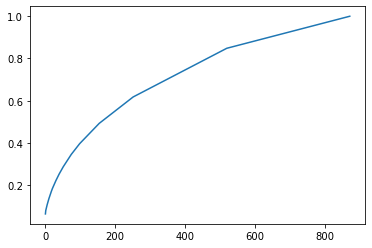

In [167]:
xx = np.arange(len(probs.crf))
plt.plot(xx,probs.crf)

In [119]:
X = count_vect_df.values[:,:]
np.sum(np.mean(X, axis = 1))

1.8576158940397351

In [100]:
#Appliyng Countvectorizer
countVectorizer = TfidfVectorizer(analyzer=clean_text) 
countVector = countVectorizer.fit_transform(df['text'])
print("{} Number of reviews has {} words".format(countVector.shape[0], countVector.shape[1]))
#print(countVectorizer.get_feature_names())
count_vect_df = pd.DataFrame(countVector.toarray(), columns=countVectorizer.get_feature_names())
count_vect_df


100 Number of reviews has 604 words


/Users/juanolmos/opt/anaconda3/envs/dl/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,,across,action,actual,af,airport,al,album,alexa,algorithm,...,xbox,yall,ye,year,yesterday,yet,ynabest,ynasv,yo,young
0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.349663,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.196526,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
96,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.196526,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
97,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
98,0.138281,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [137]:
count_vect_df.columns

Index(['', 'access', 'acknowledg', 'across', 'activ', 'actual', 'advertis',
       'airpod', 'airport', 'album',
       ...
       'x', 'xbox', 'xyxrmjsa', 'yall', 'ye', 'year', 'yet', 'yo', 'young',
       'youtub'],
      dtype='object', length=550)

In [106]:
pd.DataFrame(count_vect_df.mean())


,0
,0.034770
across,0.003587
action,0.003202
actual,0.001947
af,0.001958
...,...
yet,0.003813
ynabest,0.006117
ynasv,0.005968
yo,0.002203


In [ ]:
def computeTF(wordDict, bagOfWords):
    tfDict = {}
    bagOfWordsCount = len(bagOfWords)
    for word, count in wordDict.items():
        tfDict[word] = count / float(bagOfWordsCount)
    return tfDict

In [88]:
# Most Used Words
count = pd.DataFrame(count_vect_df.sum())
countdf = count.sort_values(0,ascending=False).head(20)
countdf[1:11]

,0
,15
get,11
order,10
one,9
peopl,8
thank,8
deliveri,7
thing,7
fuck,7
work,7


In [94]:
#Function to ngram
def get_top_n_gram(corpus,ngram_range,n=None):
    vec = CountVectorizer(ngram_range=ngram_range,stop_words = "english").fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
#n2_bigram
n2_bigrams = get_top_n_gram(df["text"],(3,3),20)
n2_bigrams


[('pic twitter com', 5),
 ('cheap shots microsoft', 3),
 ('services features digital', 3),
 ('google amazon tremendous', 3),
 ('amazon tremendous reach', 3),
 ('tremendous reach ignore', 3),
 ('reach ignore threat', 3),
 ('amazon scheduled reverse', 2),
 ('scheduled reverse pick', 2),
 ('reverse pick 28', 2),
 ('pick 28 feb', 2),
 ('28 feb 2020', 2),
 ('feb 2020 person', 2),
 ('2020 person comes', 2),
 ('person comes pick', 2),
 ('comes pick refuse', 2),
 ('pick refuse pick', 2),
 ('refuse pick saying', 2),
 ('pick saying number', 2),
 ('saying number matching', 2)]

# References

* [https://www.kaggle.com/datasets/jp797498e/twitter-entity-sentiment-analysis](https://www.kaggle.com/datasets/jp797498e/twitter-entity-sentiment-analysis)